# Dutch Bros Marketing Survey Data Analysis

**NOTE: REMEMBER CODEBOOK**

## Preparing the Data

In [65]:
# import packages
import pandas as pd
import numpy as np

In [66]:
# read the data
dutch_df=pd.read_excel('dutch_bros_data.xlsx')
dutch_df

,id,top3_starbucks,top3_dutch,top3_peet,top3_dunkin,top3_local,top3_other,shop_freq_dutch,shop_freq_starbucks,shop_freq_dunkin,...,habit_stress,habit_finances,habit_convenience,habit_productivity,habit_other,age,gender,state,west_coast,non_west_coast
0,1,1,1,1,0,0,0,30,70,0,...,0,1,0,0,0,18-20,Male,Oregon,1,0
1,2,1,1,1,0,0,0,55,20,0,...,0,0,1,0,0,18-20,Male,Oregon,1,0
2,3,1,1,0,1,0,0,40,50,10,...,0,0,0,0,0,18-20,Male,California,1,0
3,4,1,1,0,0,0,1,50,40,10,...,1,0,0,1,0,18-20,Female,Colorado,0,1
4,5,1,1,0,0,1,0,60,40,0,...,0,0,0,0,0,18-20,Female,Oregon,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,1,1,1,0,0,0,30,10,0,...,0,0,1,0,0,18-20,Male,Oregon,1,0
62,63,1,0,0,0,1,0,0,40,0,...,0,0,0,0,0,21-23,Non-binary / third gender,Oregon,1,0
63,64,1,1,0,0,0,0,80,20,0,...,0,0,0,0,0,21-23,Female,Oregon,1,0
64,65,1,1,0,0,1,0,20,50,0,...,0,0,0,0,0,18-20,Female,Oregon,1,0


In [67]:
dutch_df.drop('state', axis=1, inplace=True)

In [68]:
# test to see if any null values
dutch_df.isnull().any()

id                                    False
top3_starbucks                        False
top3_dutch                            False
top3_peet                             False
top3_dunkin                           False
top3_local                            False
top3_other                            False
shop_freq_dutch                       False
shop_freq_starbucks                   False
shop_freq_dunkin                      False
shop_freq_other                       False
describe_good                         False
describe_convenient                   False
describe_bad                          False
describe_fun                          False
describe_sweet                        False
describe_expensive                    False
describe_energy_caff                  False
describe_other                        False
familiarity                           False
discovery                             False
aware_other_drinks                    False
quality                         

No null values!

In [69]:
dutch_df['purchase_motive']

0     Taste
1     Taste
2     Taste
3     Taste
4     Taste
      ...  
61    Taste
62     None
63    Taste
64    Taste
65     None
Name: purchase_motive, Length: 66, dtype: object

In [70]:
dutch_df['typical_order'] = dutch_df['typical_order'].astype(str)

In [71]:
condition_drip=[dutch_df['typical_order'].str.contains('Drip coffee')]
dutch_df['typical_order_drip'] = np.select(condition_drip, '1', default='0')
dutch_df['typical_order_drip']

0     1
1     0
2     0
3     0
4     0
     ..
61    0
62    0
63    0
64    0
65    0
Name: typical_order_drip, Length: 66, dtype: object

In [121]:
dutch_df_dummies=pd.get_dummies(dutch_df)
dutch_df_dummies.head(2)

,id,top3_starbucks,top3_dutch,top3_peet,top3_dunkin,top3_local,top3_other,shop_freq_dutch,shop_freq_starbucks,shop_freq_other,...,intake_change_Decreased,intake_change_Have not changed,intake_change_Increased,age_18-20,age_21-23,age_24-26,age_27 and older,gender_Female,gender_Male,gender_Non-binary / third gender
0,1,1,1,1,0,0,0,30,70,0,...,1,0,0,1,0,0,0,0,1,0
1,2,1,1,1,0,0,0,55,20,25,...,0,0,1,1,0,0,0,0,1,0


In [122]:
dutch_df_dummies.to_csv('dutch_df_dummies.csv')

## Creating Cross Tabs With Pandas

### Does age affect caffeine spending?

In [72]:
pd.crosstab(dutch_df.age,dutch_df.avg_caf_spend,margins=True,margins_name="Total")

avg_caf_spend,$0,$1-7,$13-19,$20-26,$27+,$8-12,Total
age,,,,,,,
18-20,5,7,3,1,1,9,26
21-23,4,14,5,7,0,6,36
24-26,0,0,0,1,1,0,2
27 and older,1,0,0,0,0,1,2
Total,10,21,8,9,2,16,66


In [73]:
pd.crosstab(dutch_df.age,dutch_df.avg_caf_spend,margins=True,margins_name="Total",normalize=True)

avg_caf_spend,$0,$1-7,$13-19,$20-26,$27+,$8-12,Total
age,,,,,,,
18-20,0.075758,0.106061,0.045455,0.015152,0.015152,0.136364,0.393939
21-23,0.060606,0.212121,0.075758,0.106061,0.000000,0.090909,0.545455
24-26,0.000000,0.000000,0.000000,0.015152,0.015152,0.000000,0.030303
27 and older,0.015152,0.000000,0.000000,0.000000,0.000000,0.015152,0.030303
Total,0.151515,0.318182,0.121212,0.136364,0.030303,0.242424,1.000000


### Does gender affect likelihood of purchase given a voucher?

In [74]:
pd.crosstab(dutch_df.gender,dutch_df.purchase_voucher,margins=True,margins_name="Total")

purchase_voucher,1,2,3,4,5,Total
gender,,,,,,
Female,20,3,1,0,0,24
Male,23,8,2,2,4,39
Non-binary / third gender,1,0,1,0,1,3
Total,44,11,4,2,5,66


In [75]:
pd.crosstab(dutch_df.gender,dutch_df.purchase_voucher,margins=True,margins_name="Total",normalize=True)

purchase_voucher,1,2,3,4,5,Total
gender,,,,,,
Female,0.303030,0.045455,0.015152,0.000000,0.000000,0.363636
Male,0.348485,0.121212,0.030303,0.030303,0.060606,0.590909
Non-binary / third gender,0.015152,0.000000,0.015152,0.000000,0.015152,0.045455
Total,0.666667,0.166667,0.060606,0.030303,0.075758,1.000000


### Does main motive affect purchase frequency?

In [76]:
pd.crosstab(dutch_df.purchase_motive,dutch_df.purchase_caf_freq,margins=True,margins_name="Total")

purchase_caf_freq,2-4 times a week,5-7 times a week,More than 7 times a week,Never,Once a week,Total
purchase_motive,,,,,,
Convenience,3,2,0,0,1,6
Energy Boost,6,4,1,0,1,12
None,3,1,1,6,5,16
Other,1,0,0,0,2,3
Price,1,0,0,0,0,1
Taste,6,4,2,4,12,28
Total,20,11,4,10,21,66


In [130]:
hyp1_cross=pd.crosstab(dutch_df.purchase_motive,dutch_df.purchase_caf_freq)
hyp1_cross

purchase_caf_freq,2-4 times a week,5-7 times a week,More than 7 times a week,Never,Once a week
purchase_motive,,,,,
Convenience,3,2,0,0,1
Energy Boost,6,4,1,0,1
None,3,1,1,6,5
Other,1,0,0,0,2
Price,1,0,0,0,0
Taste,6,4,2,4,12


<AxesSubplot:ylabel='purchase_motive'>

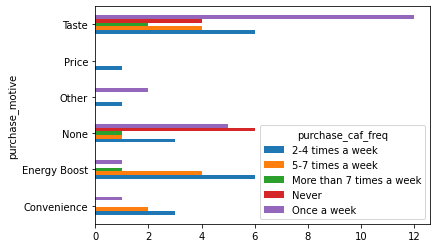

In [132]:
hyp1_cross.plot.barh()

In [77]:
pd.crosstab(dutch_df.purchase_motive,dutch_df.purchase_caf_freq,margins=True,margins_name="Total",normalize=True)

purchase_caf_freq,2-4 times a week,5-7 times a week,More than 7 times a week,Never,Once a week,Total
purchase_motive,,,,,,
Convenience,0.045455,0.030303,0.000000,0.000000,0.015152,0.090909
Energy Boost,0.090909,0.060606,0.015152,0.000000,0.015152,0.181818
None,0.045455,0.015152,0.015152,0.090909,0.075758,0.242424
Other,0.015152,0.000000,0.000000,0.000000,0.030303,0.045455
Price,0.015152,0.000000,0.000000,0.000000,0.000000,0.015152
Taste,0.090909,0.060606,0.030303,0.060606,0.181818,0.424242
Total,0.303030,0.166667,0.060606,0.151515,0.318182,1.000000


### Respondents who mostly commonly purchase coffee via drive-thru purchase caffeine more often

In [127]:
hyp2_cross=pd.crosstab(dutch_df.purchase_method,dutch_df.purchase_caf_freq)

<AxesSubplot:ylabel='purchase_method'>

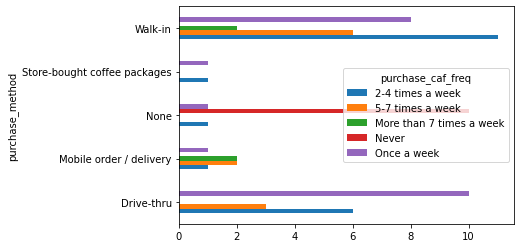

In [128]:
hyp2_cross.plot.barh()

In [79]:
pd.crosstab(dutch_df.purchase_method,dutch_df.purchase_caf_freq,margins=True,margins_name="Total",normalize=True)

purchase_caf_freq,2-4 times a week,5-7 times a week,More than 7 times a week,Never,Once a week,Total
purchase_method,,,,,,
Drive-thru,0.090909,0.045455,0.000000,0.000000,0.151515,0.287879
Mobile order / delivery,0.015152,0.030303,0.030303,0.000000,0.015152,0.090909
None,0.015152,0.000000,0.000000,0.151515,0.015152,0.181818
Store-bought coffee packages,0.015152,0.000000,0.000000,0.000000,0.015152,0.030303
Walk-in,0.166667,0.090909,0.030303,0.000000,0.121212,0.409091
Total,0.303030,0.166667,0.060606,0.151515,0.318182,1.000000


### Respondents who mostly commonly purchase coffee via drive-thru spend more on caffeine on average`

In [124]:
pd.crosstab(dutch_df.purchase_method,dutch_df.avg_caf_spend,margins=True,margins_name="Total")

avg_caf_spend,$0,$1-7,$13-19,$20-26,$27+,$8-12,Total
purchase_method,,,,,,,
Drive-thru,0,11,1,3,0,4,19
Mobile order / delivery,0,1,1,3,1,0,6
None,10,1,1,0,0,0,12
Store-bought coffee packages,0,1,0,0,0,1,2
Walk-in,0,7,5,3,1,11,27
Total,10,21,8,9,2,16,66


<AxesSubplot:ylabel='purchase_method'>

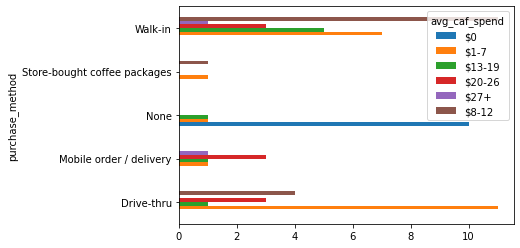

In [115]:
hyp3_cross.plot.barh()

In [81]:
pd.crosstab(dutch_df.purchase_method,dutch_df.avg_caf_spend,margins=True,margins_name="Total",normalize=True)

avg_caf_spend,$0,$1-7,$13-19,$20-26,$27+,$8-12,Total
purchase_method,,,,,,,
Drive-thru,0.000000,0.166667,0.015152,0.045455,0.000000,0.060606,0.287879
Mobile order / delivery,0.000000,0.015152,0.015152,0.045455,0.015152,0.000000,0.090909
None,0.151515,0.015152,0.015152,0.000000,0.000000,0.000000,0.181818
Store-bought coffee packages,0.000000,0.015152,0.000000,0.000000,0.000000,0.015152,0.030303
Walk-in,0.000000,0.106061,0.075758,0.045455,0.015152,0.166667,0.409091
Total,0.151515,0.318182,0.121212,0.136364,0.030303,0.242424,1.000000


### Respondents who are aged 18-23 (Gen Z) prefer to order sweet coffee drinks?

In [92]:
pd.crosstab(index=dutch_df.age,columns=dutch_df.typical_order_sweet_cofee,margins=True,
           margins_name='Total')

typical_order_sweet_cofee,0,1,Total
age,,,
18-20,11,15,26
21-23,18,18,36
24-26,1,1,2
27 and older,1,1,2
Total,31,35,66


In [93]:
pd.crosstab(index=dutch_df.age,columns=[dutch_df.typical_order_sweet_cofee,dutch_df.typical_order_drip,
                                        dutch_df.typical_order_food,dutch_df.typical_order_smoothies_milkshakes,
                                        dutch_df.typical_order_tea],margins=True,margins_name='Total')

typical_order_sweet_cofee           0                               1        \
typical_order_drip                  0                     1         0         
typical_order_food                  0           1         0     1   0     1   
typical_order_smoothies_milkshakes  0     1     0  1      0  1  0   0     0   
typical_order_tea                   0  1  0  1  0  0  1   0  0  0   0  1  0   
age                                                                           
18-20                               0  3  3  0  1  0  1   3  0  0   7  2  1   
21-23                               3  2  1  1  0  2  0   6  0  3  10  2  0   
24-26                               0  0  0  0  0  0  0   0  1  0   1  0  0   
27 and older                        0  0  0  0  0  0  0   1  0  0   1  0  0   
Total                               3  5  4  1  1  2  1  10  1  3  19  4  1   

typical_order_sweet_cofee                         Total  
typical_order_drip                           1           
typical_order_food                           0  1        
typical_order_smoothies_milkshakes     1     0  0        
typical_order_tea                   1  0  1  0  0        
age                                                      
18-20                               3  0  1  1  0    26  
21-23                               1  1  1  1  2    36  
24-26                               0  0  0  0  0     2  
27 and older                        0  0  0  0  0     2  
Total                               4  1  2  2  2    66

In [96]:
pd.crosstab(index=dutch_df.age,columns=[dutch_df.typical_order_sweet_cofee,dutch_df.typical_order_drip,
                                        dutch_df.typical_order_food,dutch_df.typical_order_smoothies_milkshakes,
                                        dutch_df.typical_order_tea],margins=True,margins_name='Total',
           normalize=True)

typical_order_sweet_cofee                  0                                \
typical_order_drip                         0                                 
typical_order_food                         0                                 
typical_order_smoothies_milkshakes         0                   1             
typical_order_tea                          0         1         0         1   
age                                                                          
18-20                               0.000000  0.045455  0.045455  0.000000   
21-23                               0.045455  0.030303  0.015152  0.015152   
24-26                               0.000000  0.000000  0.000000  0.000000   
27 and older                        0.000000  0.000000  0.000000  0.000000   
Total                               0.045455  0.075758  0.060606  0.015152   

typical_order_sweet_cofee                                                   \
typical_order_drip                                                       1   
typical_order_food                         1                             0   
typical_order_smoothies_milkshakes         0         1                   0   
typical_order_tea                          0         0         1         0   
age                                                                          
18-20                               0.015152  0.000000  0.015152  0.045455   
21-23                               0.000000  0.030303  0.000000  0.090909   
24-26                               0.000000  0.000000  0.000000  0.000000   
27 and older                        0.000000  0.000000  0.000000  0.015152   
Total                               0.015152  0.030303  0.015152  0.151515   

typical_order_sweet_cofee                                      1            \
typical_order_drip                                             0             
typical_order_food                                   1         0             
typical_order_smoothies_milkshakes         1         0         0             
typical_order_tea                          0         0         0         1   
age                                                                          
18-20                               0.000000  0.000000  0.106061  0.030303   
21-23                               0.000000  0.045455  0.151515  0.030303   
24-26                               0.015152  0.000000  0.015152  0.000000   
27 and older                        0.000000  0.000000  0.015152  0.000000   
Total                               0.015152  0.045455  0.287879  0.060606   

typical_order_sweet_cofee                                                   \
typical_order_drip                                                           
typical_order_food                         1                                 
typical_order_smoothies_milkshakes         0                   1             
typical_order_tea                          0         1         0         1   
age                                                                          
18-20                               0.015152  0.045455  0.000000  0.015152   
21-23                               0.000000  0.015152  0.015152  0.015152   
24-26                               0.000000  0.000000  0.000000  0.000000   
27 and older                        0.000000  0.000000  0.000000  0.000000   
Total                               0.015152  0.060606  0.015152  0.030303   

typical_order_sweet_cofee                                  Total  
typical_order_drip                         1                      
typical_order_food                         0         1            
typical_order_smoothies_milkshakes         0         0            
typical_order_tea                          0         0            
age                                                               
18-20                               0.015152  0.000000  0.393939  
21-23                               0.015152  0.030303  0.545455  
24-26                       

# Read dutch_df_dummies

In [134]:
dutch_df_dummy=pd.read_csv('dutch_df_dummies.csv',index_col=0)
dutch_df_dummy

,top3_starbucks,top3_dutch,top3_peet,top3_dunkin,top3_local,top3_other,shop_freq_dutch,shop_freq_starbucks,shop_freq_other,describe_good,...,intake_change_Decreased,intake_change_Have not changed,intake_change_Increased,age_18-20,age_21-23,age_24-26,age_27 and older,gender_Female,gender_Male,gender_Non-binary / third gender
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,0,30,70,0,1,...,1,0,0,1,0,0,0,0,1,0
2,1,1,1,0,0,0,55,20,25,0,...,0,0,1,1,0,0,0,0,1,0
3,1,1,0,1,0,0,40,50,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,0,0,0,1,50,40,0,1,...,0,0,1,1,0,0,0,1,0,0
5,1,1,0,0,1,0,60,40,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1,1,0,0,0,30,10,60,0,...,1,0,0,1,0,0,0,0,1,0
63,1,0,0,0,1,0,0,40,60,0,...,0,1,0,0,1,0,0,0,0,1
64,1,1,0,0,0,0,80,20,0,0,...,0,1,0,0,1,0,0,1,0,0
